### Запуск QtLab

In [1]:
%matplotlib qt5

In [1]:
from qsweepy import *
from qsweepy.instruments import *
from qsweepy.save_pkl import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive
import pandas as pd
interactive(True)

In [2]:
#import resonator_quality_factor_fit
import imp
imp.reload(resonator_quality_factor_fit)
import qsweepy.save_pkl
imp.reload(qsweepy.save_pkl)
from qsweepy.save_pkl import *

In [3]:
rf_switch = nn_rf_switch('rf_switch', address='10.20.61.224')

In [4]:
pna = Agilent_N5242A('pna', address = 'TCPIP0::10.20.61.48::inst0::INSTR')

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



In [5]:
switch_sample = {1:1, 5:2, 6:3, 4:0}

In [6]:
db = database.database()
sweeper = sweep_extras.sweeper(db)

# Прицеливание

In [55]:
#sample_name = '1901-006-1'.format(switch_sample[rf_switch.get_ch2_switch()])
sample_name = '1904-040-2-darya'
#sample_name = '1902-164-1'
resonator_type='notch_port'
min_freq = 3.5e9
max_freq = 7.0e9
data_root = get_location()

save_path = '{0}/{1}/{2}'.format(data_root[0], data_root[1], sample_name)

In [116]:
os.mkdir(save_path)

In [10]:
pna.set_measurement('S21')

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



In [57]:
pna.set_average(1)
pna.set_averages(1)
pna.set_xlim(3.5e9, 7.0e9)
pna.set_nop(7001)
pna.set_bandwidth(1e3)
pna.set_power(-35)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



True

In [58]:
pna.set_sweep_mode("LIN")

True

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



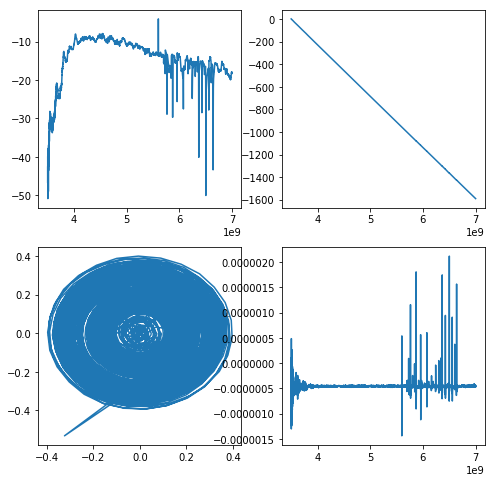

In [59]:
fig, axes=plt.subplots(2,2, figsize=(8,8))
freqs=pna.get_freqpoints()
S21=pna.get_tracedata()
phase = np.unwrap(S21[1])
delay = np.gradient(phase)/(freqs[1]-freqs[0])
#delay_freqs = (np.asarray(freqs[1:])+np.asarray(freqs[:-1]))/2
delay_freqs=freqs
axes[0,0].plot(freqs,10*np.log10(S21[0]**2))
axes[0,1].plot(freqs, phase)
axes[1,0].plot(np.real(S21[0]*np.exp(1j*S21[1])),np.imag(S21[0]*np.exp(1j*S21[1])))
axes[1,1].plot(delay_freqs, delay)
#axes[1,1].set_yscale('log')

In [23]:
sweeper.sweep(pna, 
              sample_name=sample_name, 
              metadata={'probe_power':-35,
                        'bw':1000})

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}
load_exdir: file open time:  0.001993417739868164
load_exdir: file open time:  0.0009987354278564453
load_exdir: file open time:  0.001983165740966797
load time:  0.03798317909240723
pre_trace_time:  0.001003265380859375
trace 0 time:  0.012971162796020508
trace 1 time:  0.025966167449951172
trace 2 time:  0.037976741790771484
trace 3 time:  0.049971818923950195


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



start: 2019-04-29 01:16:12.700257, started/done/total sweeps: 0/1/1.0, 
Measured data: 
'S-parameter': parameters: Frequency (Hz),:[5500000000.0, 7000000000.0] (12001 points) without setter
data: [-0.10568867+0.16610566j -0.0690169 +0.16052924j -0.07121719+0.17031014j
 ...  0.08666185-0.04585463j  0.073513  -0.05186208j
  0.07164294-0.06285709j]

In [83]:
threshold = 2.8e-7
baseline = -3.4e-7

found 24 peaks
5702400000.0 ,
5727600000.0 ,
5766400000.0 ,
5812000000.0 ,
5840400000.0 ,
5874000000.0 ,
5922000000.0 ,
5954000000.0 ,
5987600000.0 ,
6044800000.0 ,
6073200000.0 ,
6110800000.0 ,
6164000000.0 ,
6170000000.0 ,
6198000000.0 ,
6233600000.0 ,
6330800000.0 ,
6364400000.0 ,
6422400000.0 ,
6460800000.0 ,
6500400000.0 ,
6556000000.0 ,
6602000000.0 ,
6639600000.0 ,


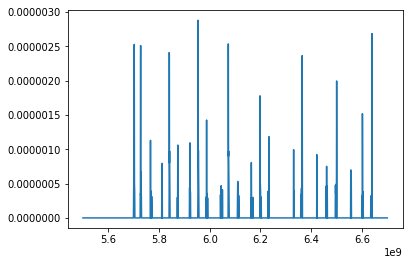

In [84]:
from scipy.signal import detrend
from scipy.signal import find_peaks_cwt
from scipy.signal import argrelextrema
peaks_expected = 0.1
data = S21
data_points = len(data[0])
data_complex = 10**(data[0]/20)*np.exp(1j*detrend(np.unwrap(data[1])))
data_diff = delay-baseline#np.abs(delay-baseline)
data_diff = np.abs(delay-baseline)
data_diff[data_diff<threshold] = 0
#data_diff[data_diff>-threshold] = 0
plt.figure('delay')
plt.plot(freqs, data_diff)
data_diff=np.abs(data_diff)
#peaks = find_peaks_cwt(data_diff, np.linspace(1, 8, 4), noise_perc=100-(100.*peaks_expected)/data_points)
neighborhood_size = int(np.floor(5e6/(freqs[1]-freqs[0])))
peaks = argrelextrema(data_diff, np.greater, order=neighborhood_size)[0]
print ('found {0} peaks'.format(len(peaks)))
peak_freqs = freqs[peaks]
for freq_id, freq in enumerate(peak_freqs):
    print (freq, ',')

In [85]:
peak_freqs = [5702400000.0 ,5727600000.0 ,5766400000.0 ,5812000000.0 ,5840400000.0 ,
5874000000.0 ,5922000000.0 ,5954000000.0 ,5987600000.0 ,6044800000.0 ,6073200000.0 ,
6110800000.0 ,6164000000.0 ,6197000000.0 ,6232000000.0 ,6290000000.0, 6330800000.0 ,
6364400000.0 ,6422400000.0 ,6460800000.0 ,6500400000.0 ,6556000000.0 ,6602000000.0 ,
6639600000.0]

In [87]:
#rescan peaks individually and fit via circlefit
from resonator_tools import circuit

typical_span=8e6
bw=30e3
nop = typical_span/bw
#pna.set_bandwidth(bw)
pna.set_nop(nop)
pna.set_span(typical_span)
pna.pre_sweep()
delay_estimate=72e-9
high_power_fits = []
for freq_id, freq in enumerate(peak_freqs):
    pna.set_centerfreq(freq)
    measurement = pna.measure()['S-parameter']
    points = pna.get_points()['S-parameter'][0][1]
    delay = np.gradient(measurement)
    fitter = circuit.reflection_port if resonator_type == 'reflection_port' else circuit.notch_port
    fitter = fitter(f_data = points, z_data_raw=measurement)
    fitter.autofit(electric_delay=delay_estimate)
    high_power_fits.append(fitter.fitresults)
    plt.figure(freq_id)
    fitter.plotall()
pna.post_sweep()
high_power_fits = pd.DataFrame(high_power_fits)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



In [53]:
high_power_fits = pd.DataFrame(high_power_fits)
resonator_freqs = high_power_fits['fr']
resonator_freq_spans = (high_power_fits['fr']/high_power_fits['Ql']*5).tolist()
resonator_freqs, resonator_freq_spans

NameError: name 'high_power_fits' is not defined

In [54]:
[i/1e9 for i in resonator_freqs]

[5.70041,
 5.721,
 5.7643,
 5.8086,
 5.8328,
 5.87097,
 5.9098,
 5.9483,
 5.9817,
 6.0459,
 6.0682,
 6.1012,
 6.1669,
 6.1936,
 6.2259,
 6.2948,
 6.3205,
 6.3388,
 6.3887,
 6.4254,
 6.4608,
 6.4866,
 6.5233,
 6.5574,
 6.6065,
 6.6578]

In [21]:
#resonator_freqs[1] = 6.3855e9
#resonator_freqs[2] = 6.6622e9
#resonator_freqs[4] = 7.07635e9
#resonator_freqs[8] = 7.637e9
#resonator_freqs[9] = 7.776e9

#resonator_freq_spans[1] = 1e6
#resonator_freq_spans[2] = 0.5e6
#resonator_freq_spans[4] = 2e6
#resonator_freq_spans[8] = 8e6
#resonator_freq_spans[9] = 8e6
#resonator_freq_spans[8] = 5e6
#resonator_freq_spans[9] = 5e6
#resonator_freq_spans[22] = 8.583e6
#resonator_freq_spans[22] = 10e6

In [ ]:
resonator_freqs, resonator_freq_spans

In [86]:
resonator_freqs = peak_freqs

In [87]:
resonator_ids = n

NameError: name 'resonator_ids' is not defined

# Мерить зонаторы

In [45]:
resonator_freqs = [ 7.108e9, 8.824e9, 7.302e9]

In [46]:
#resonator_freqs = [ 
#6.6532e9
#6.8037e9,    
#]
#powers = np.linspace(-10, -45, 36) # длинный скан
#powers = np.linspace(-20, -40, 41) # короткий скан

In [91]:
#powers = np.linspace(0, -30, 31) # короткий скан
powers = np.linspace(5, -45, 51) # длинный скан

In [89]:
resonator_ids = [i for i,f in enumerate(resonator_freqs)]
#resonator_ids = np.asarray([22, 23])-1

In [90]:
len(resonator_freqs)

24

In [44]:
import imp 
imp.reload(resonator_quality_factor_fit)

<module 'qsweepy.resonator_quality_factor_fit' from 'C:\\qtlab_replacement\\qsweepy\\resonator_quality_factor_fit.py'>

In [92]:
#resonator_freq_span = 5e6
#resonator_freq_spans = None

for resonator_id, resonator_freq in enumerate(resonator_freqs):
    if resonator_id not in resonator_ids:
        continue
    if resonator_freq_spans:
        resonator_freq_span = resonator_freq_spans[resonator_id]
    if resonator_freq_span<1e6:
        resonator_freq_span = 1e6
    pna.set_xlim(resonator_freq-resonator_freq_span/2, resonator_freq+resonator_freq_span/2)

    pna.set_nop(101)
    pna.set_average(1)
    pna.set_averages(1)
    
    
    pna.set_bandwidth(1)
    pna._visainstrument.write("SENS:AVER:MODE POIN")

    ref_pow = np.array(	[-70,	-20.,	30.]	)
    ref_bw = np.array(	[1.,	100000.,	100000.]	)
    def set_power(power):
        bw = 10**np.interp(power, ref_pow, np.log10(ref_bw))
        pna.set_bandwidth(bw)
        pna.set_power(power)
        
    measurement = sweeper.sweep(pna, 
                              (powers, set_power, 'Power'), 
                              sample_name=sample_name,
                              measurement_type='resonator_powerscan',
                              type_revision='0',
                              metadata={'resonator_id': resonator_id,
                                        'freq_guess': resonator_freq,
                                        'span_guess': resonator_freq_span,
                                        'num_averages': pna.get_averages()})
    
    fitdata = resonator_quality_factor_fit.resonator_quality_factor_fit(measurement, powers, resonator_type=resonator_type, delay=delay_estimate)
    default_measurement_save_path(save_path, mkdir=True)
    fitdata.to_csv(save_path+'/'+'fit_total {0}.csv'.format(resonator_id))
    plt.close()
    plt.close()
    #print(fitdata)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}
load_exdir: file open time:  0.0019969940185546875
load_exdir: file open time:  0.001020193099975586
load_exdir: file open time:  0.000993967056274414
load time:  0.042002201080322266
pre_trace_time:  0.00099945068359375
trace 0 time:  0.028964996337890625
trace 1 time:  0.05395102500915527
trace 2 time:  0.0799415111541748
trace 3 time:  0.10694408416748047


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



{}
load_exdir: file open time:  0.00201416015625
load_exdir: file open time:  0.0009965896606445312
load_exdir: file open time:  0.001983165740966797
load time:  0.042983293533325195
pre_trace_time:  0.0010118484497070312
trace 0 time:  0.024971723556518555
trace 1 time:  0.04796147346496582
trace 2 time:  0.06994915008544922
trace 3 time:  0.09492087364196777
{}
load_exdir: file open time:  0.002021312713623047
load_exdir: file open time:  0.001975536346435547
load_exdir: file open time:  0.0009996891021728516
load time:  0.047977447509765625
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.029008150100708008
trace 1 time:  0.05499768257141113
trace 2 time:  0.08097410202026367
trace 3 time:  0.10396647453308105


C:\ProgramData\Anaconda3\lib\site-packages\resonator_tools\circuit.py:393: RuntimeWarning:

invalid value encountered in sqrt

C:\ProgramData\Anaconda3\lib\site-packages\resonator_tools\circuit.py:398: RuntimeWarning:

invalid value encountered in sqrt

C:\ProgramData\Anaconda3\lib\site-packages\resonator_tools\circuit.py:406: RuntimeWarning:

invalid value encountered in sqrt



{}
load_exdir: file open time:  0.0009965896606445312
load_exdir: file open time:  0.0010211467742919922
load_exdir: file open time:  0.000997781753540039
load time:  0.04398179054260254
pre_trace_time:  0.0
trace 0 time:  0.027985811233520508
trace 1 time:  0.05197286605834961
trace 2 time:  0.07696342468261719
trace 3 time:  0.10292840003967285
{}
load_exdir: file open time:  0.0019986629486083984
load_exdir: file open time:  0.0009992122650146484
load_exdir: file open time:  0.0009996891021728516
load time:  0.039980411529541016
pre_trace_time:  0.00099945068359375
trace 0 time:  0.023989200592041016
trace 1 time:  0.04597830772399902
trace 2 time:  0.06796789169311523
trace 3 time:  0.0889580249786377
{}
load_exdir: file open time:  0.0009996891021728516
load_exdir: file open time:  0.0009996891021728516
load_exdir: file open time:  0.0009989738464355469
load time:  0.03998064994812012
pre_trace_time:  0.0009996891021728516
trace 0 time:  0.02298879623413086
trace 1 time:  0.043978

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning:

Covariance of the parameters could not be estimated



{}
load_exdir: file open time:  0.0010161399841308594
load_exdir: file open time:  0.0010170936584472656
load_exdir: file open time:  0.0019943714141845703
load time:  0.037976980209350586
pre_trace_time:  0.0009837150573730469
trace 0 time:  0.02400994300842285
trace 1 time:  0.04599785804748535
trace 2 time:  0.06798410415649414
trace 3 time:  0.09195566177368164
{}
load_exdir: file open time:  0.0009965896606445312
load_exdir: file open time:  0.0020055770874023438
load_exdir: file open time:  0.0019986629486083984
load time:  0.040982723236083984
pre_trace_time:  0.0009992122650146484
trace 0 time:  0.02398538589477539
trace 1 time:  0.04598093032836914
trace 2 time:  0.06796956062316895
trace 3 time:  0.08995294570922852
{}
load_exdir: file open time:  0.002015352249145508
load_exdir: file open time:  0.0010187625885009766
load_exdir: file open time:  0.0020203590393066406
load time:  0.04697895050048828
pre_trace_time:  0.0
trace 0 time:  0.02600860595703125
trace 1 time:  0.0499

# load last measurements and refit

In [56]:
%matplotlib qt5
import resonator_tools.circuit
from qsweepy import *
import pickle
import matplotlib.pyplot as plt

In [80]:
save_path
#save_path=r'C:\Data\2019-02-20'
import pony.orm

In [82]:
db.Metadata.select(lambda m: m.name == 'resonator_id' and m.value== str(1)).order_by(lambda m: pony.orm.desc(m.id)).first()

Metadata[189]

In [90]:
str(m.data_id.filename)

'c:\\data\\2019-04-19\\000086-resonator_powerscan-1904-037'

In [99]:
save_path

'c:\\data/2019-04-19/1904-037'

In [172]:
import resonator_tools
imp.reload(resonator_quality_factor_fit) 

<module 'qsweepy.resonator_quality_factor_fit' from 'C:\\qtlab_replacement\\qsweepy\\resonator_quality_factor_fit.py'>

In [173]:
import glob
#measurement_pattern = r'C:\Data\2019-04-19\*.exdir'
#measurement_pattern = r'C:\Data\2019-02-20\*-1901-014-2 res {}\*.pkl'
for resonator_id in range(24):
    m = db.Metadata.select(lambda m: m.name == 'resonator_id' and m.value== str(resonator_id)).order_by(lambda m: pony.orm.desc(m.id)).first()
    measurement = save_exdir.load_exdir(str(m.data_id.filename))
    #measurements = glob.glob(measurement_pattern.format(resonator_id))
    #last_measurement = measurements[-1]
    #print (last_measurement)
    #with open(last_measurement, 'rb') as f:            
    #measurement = save_exdir.load_exdir(last_measurement, db)
    powers = measurement.datasets['S-parameter'].parameters[0].values
    fitdata = resonator_quality_factor_fit.resonator_quality_factor_fit(measurement, powers, sweep_parameter_name='power', resonator_type=resonator_type, delay=delay_estimate)
    fitdata.to_csv(save_path+'/'+'fit_total {0}.csv'.format(resonator_id))
    #for i in [0]:#range(len(measurement.datasets['S-parameter'].parameters[0].values)):
    #    fitter = resonator_tools.circuit.notch_port(f_data = measurement.datasets['S-parameter'].parameters[1].values, z_data_raw=measurement.datasets['S-parameter'].data[i,:])
    #    fitter.autofit(electric_delay=delay_estimate)
    #    plt.figure()
    #    fitter.plotall()
            #plt.close()
            #plt.close()

load_exdir: file open time:  0.002001047134399414
load_exdir: metadata_time 0.016003131866455078
load_exdir: dataset_parameter_time:  0.043978214263916016
load_exdir: dataset_data_time:  0.012992620468139648
load_exdir: file open time:  0.0009951591491699219
load_exdir: metadata_time 0.013999700546264648
load_exdir: dataset_parameter_time:  0.045972347259521484
load_exdir: dataset_data_time:  0.012000560760498047


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



load_exdir: file open time:  0.0020012855529785156
load_exdir: metadata_time 0.015969514846801758
load_exdir: dataset_parameter_time:  0.045998573303222656
load_exdir: dataset_data_time:  0.010994672775268555
load_exdir: file open time:  0.0009944438934326172
load_exdir: metadata_time 0.013993978500366211
load_exdir: dataset_parameter_time:  0.043975114822387695
load_exdir: dataset_data_time:  0.010977029800415039
load_exdir: file open time:  0.0019998550415039062
load_exdir: metadata_time 0.016002655029296875
load_exdir: dataset_parameter_time:  0.04697155952453613
load_exdir: dataset_data_time:  0.012979507446289062
load_exdir: file open time:  0.001997232437133789
load_exdir: metadata_time 0.01399683952331543
load_exdir: dataset_parameter_time:  0.04695391654968262
load_exdir: dataset_data_time:  0.011976480484008789
load_exdir: file open time:  0.002999544143676758
load_exdir: metadata_time 0.015969276428222656
load_exdir: dataset_parameter_time:  0.04699110984802246
load_exdir: da

In [168]:
resonator_type

'notch_port'

In [116]:

plt.plot(measurement.datasets['S-parameter'].data[-1,:])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning:

Casting complex values to real discards the imaginary part



In [133]:
for resonator_id in [6]:
    measurements = glob.glob(measurement_pattern.format(resonator_id))
    if len(measurements):
        last_measurement = measurements[-1]
        print (last_measurement)
        with open(last_measurement, 'rb') as f:
            measurement = pickle.load(f)[1]['S-parameter']
            fitter = resonator_tools.circuit.reflection_port(f_data =measurement[1][1], z_data_raw=measurement[2][-1,:])
            plt.figure()
            #fitter.autofit()
            #fitter.plotall()
            #plt.figure()
            fitter.autofit(electric_delay=65e-9)
            fitter.plotall()
            #fitter.GUIfit()
            plt.show()

C:\Data\2019-02-03\03-02-12-1901-005-unknown res 6\1901-005-unknown res 6.pkl


# Загрузить фиты и построить графики

In [185]:
from matplotlib.backends.backend_pdf import PdfPages
fit_csvs = ['{0}/fit_total {1}.csv'.format(save_path, i) for i in range(len(resonator_freqs))]
rows = 6
columns = 1
figsize=(8.27, 11.69)
figs, axes = plt.subplots(rows,columns, figsize=figsize)
pdf = PdfPages('{0}/{1}.pdf'.format(save_path, sample_name))
Q_i_values_lp = []
Q_i_values_hp = []
Q_e_values = []
Q_l_values_lp = []
Q_l_values_hp = []
f_r_values = []
single_photon_limits = []
if resonator_type=='reflection_port':
    Qc_column = 'Qc'
    Qi_column = 'Qi'
    Qi_err_column = 'Qi_err'
    Ql_column = 'Ql'
else:
    Qc_column = 'Qc_dia_corr'
    Qi_column = 'Qi_dia_corr'
    Qi_err_column = 'Qi_dia_corr_err'
    Ql_column = 'Ql'
page_id = 0
for resonator_id, fit_csv in enumerate(fit_csvs):
    try:
        fitdata = pd.read_csv(fit_csv)
        #print (fitdata.shape, powers.shape)
        #if fitdata.shape[0]<len(powers):
        #fitdata['power'] = powers[(len(powers)-fitdata.shape[0]):]
        #fitdata['power'] = powers
        #print (fitdata, resonator_id)
        print (resonator_id, fitdata.shape)
        fitdata = fitdata[fitdata['fr']>4e9]
        fitdata = fitdata[fitdata['fr']<12e9]
        fitdata = fitdata[fitdata[Qc_column]>100]
        fitdata = fitdata[fitdata[Qc_column]<50000]
        print (resonator_id, fitdata.shape)
        #if resonator_id != 11:
        #fitdata = fitdata[fitdata[Qc_column]<800000]
        #else:
        #   fitdata = fitdata[fitdata['Qc_dia_corr']<2000000]
        if resonator_id and not resonator_id%(rows*columns):
            page_id +=1
            plt.tight_layout()
            pdf.savefig(figs)
            figs, axes = plt.subplots(rows, columns, figsize=figsize)
        if rows>1 and columns>1:
            Q_ax = axes[(resonator_id%(rows*columns))%rows, (resonator_id%(rows*columns))//rows]
        else:
            Q_ax = axes[resonator_id%(rows*columns)]
        Q_ax.set_yscale('log')
        Ql = Q_ax.errorbar(fitdata['power'], fitdata['Ql'], label='Q_l')#, yerr=fitdata['Ql_err'])
        Qc = Q_ax.errorbar(fitdata['power'], fitdata[Qc_column], label='Q_c')#, yerr=fitdata['absQc_err'])
        Qi = Q_ax.errorbar(fitdata['power'], np.abs(fitdata[Qi_column]), label='Q_i')#, yerr=fitdata['Qi_dia_corr_err'])
        f_ax = Q_ax.twinx()
        f = f_ax.errorbar(fitdata['power'], fitdata['fr']/1e6, color='orange', marker='.', label='$f$, MHz')#, yerr=fitdata['fr_err'])
        f_ax.set_ylabel('MHz')
        Q_ax.set_ylabel('$Q$')
        if not (fitdata['power'].size == 0):
            Q_i_values_lp.append(np.abs(fitdata[Qi_column])[np.argmin(fitdata['power'])])
            Q_i_values_hp.append(np.abs(fitdata[Qi_column])[np.argmax(fitdata['power'])])
            Q_e_values.append(np.median(fitdata[Qc_column]))
            Q_l_values_lp.append(np.abs(fitdata[Ql_column])[np.argmin(fitdata['power'])])
            Q_l_values_hp.append(np.abs(fitdata[Ql_column])[np.argmax(fitdata['power'])])
            f_r_values.append(np.median(fitdata['fr']))
            single_photon_limits.append(fitdata['single_photon_limit'][np.argmax(fitdata['power'])])
            ann = f_ax.annotate('#{7}: $f_r$: {0:2.4} GHz, $Q_i$: {1:2.3g}/{3:2.3g}\n$Q_l$:{5:2.3g}/{6:2.3g}, $Q_c$: {4:2.3g}'.format(np.median(fitdata['fr'])/1e9, \
                            np.round(np.abs(fitdata[Qi_column])[np.argmin(fitdata['power'])]), np.round(fitdata[Qi_err_column][np.argmin(fitdata['power'])]), \
                            np.round(np.abs(fitdata[Qi_column])[np.argmax(fitdata['power'])]), np.median(fitdata[Qc_column]), \
                            np.round(np.abs(fitdata[Ql_column])[np.argmin(fitdata['power'])]), np.round(np.abs(fitdata[Ql_column])[np.argmax(fitdata['power'])]), \
                            resonator_id), \
                          (0.2, 0.1), xycoords='axes fraction', bbox={'alpha':0.5, 'pad':3, 'edgecolor':'black', 'facecolor':'white'})
        Q_ax.set_ylim([1e3, 1e6])
        plt.grid(True)
        if (resonator_id==0):
            leg = plt.legend([f, Qc, Qi, Ql], ['$f$', '$Q_c$', '$Q_i$', '$Q_l$'], fancybox=True, loc=6, framealpha=1)
            leg.get_frame().set_alpha(0.5)
            plt.title(sample_name)
    finally:
        pass
#axes[-1,-1].hist([Q_i_values_hp, Q_i_values_lp, Q_e_values], bins=10, label={'$Q_i$ high power', '$Q_i$ low power', '$Q_e$'})
#axes[-1,-1].set_xlabel('$Q_i$')
#axes[-1,-1].set_ylabel('resonators')
#axes[-1,-1].legend(loc='upper right')
plt.tight_layout()
pdf.savefig(figs)
pdf.close()
summary_table = pd.DataFrame({'fr':f_r_values, 'Ql_lp':Q_l_values_lp, 'Ql_hp':Q_l_values_hp, 'Qe': Q_e_values, 'Qi_lp':Q_i_values_lp, 'Qi_hp':Q_i_values_hp, 'single_photon_limits':single_photon_limits})
summary_table.to_csv('{0}/{1}.csv'.format(save_path, sample_name))

0 (56, 18)
0 (56, 18)
1 (56, 18)
1 (56, 18)
2 (56, 18)
2 (56, 18)
3 (56, 18)
3 (56, 18)
4 (56, 18)
4 (56, 18)
5 (56, 18)
5 (56, 18)
6 (56, 18)
6

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.



 (56, 18)
7 (56, 18)
7 (56, 18)
8 (56, 18)
8 (56, 18)
9 (56, 18)
9 (56, 18)
10 (56, 18)
10 (56, 18)
11 (56, 18)
11 (56, 18)
12 (56, 18)
12 (56, 18)
13 (56, 18)
13 (56, 18)
14 (56, 18)
14 (56, 18)
15 (56, 18)
15 (56, 18)
16 (56, 18)
16 (56, 18)
17 (56, 18)
17 (56, 18)
18 (56, 18)
18 (56, 18)
19 (56, 18)
19 (56, 18)
20 (56, 18)
20 (56, 18)
21 (56, 18)
21 (56, 18)
22 (56, 18)
22 (56, 18)
23 (56, 18)
23 (47, 18)


In [176]:
import math
summary_table_new = pd.DataFrame(summary_table)
summary_table_new['k'] = summary_table_new['fr']/summary_table_new['Qe']
(summary_table_new['Ql_lp']).round(decimals=0).astype(int)

0      335
1     3495
2     3165
3     3000
4     3616
5     3543
6     3174
7     2970
8     3389
9     2333
10    3190
11    2516
12    2262
13    2478
14    4498
15    1477
16    4497
17    1000
18    3376
19    2511
20     675
21    1436
22     582
23    1699
Name: Ql_lp, dtype: int32

In [177]:
import math
summary_table_new = pd.DataFrame(summary_table)
summary_table_new['k'] = summary_table_new['fr']/summary_table_new['Qe']
summary_table_new

,fr,Ql_lp,Ql_hp,Qe,Qi_lp,Qi_hp,single_photon_limits,k
0,5.034006e+09,334.505193,334.366109,915.284421,525.660155,5.257445e+02,-126.641278,5.499937e+06
1,5.678916e+09,3494.843039,3515.062141,3527.353984,293884.388625,6.358400e+05,-140.176184,1.609965e+06
2,5.710855e+09,3164.872771,3191.550163,3225.121440,170677.045955,2.313379e+05,-139.671906,1.770741e+06
3,5.745575e+09,3000.431391,2994.975791,3008.822635,385594.671593,1.035949e+06,-139.390931,1.909576e+06
4,5.786669e+09,3615.983189,3654.832806,3695.062166,172241.497824,3.310027e+05,-140.158117,1.566055e+06
5,5.819798e+09,3542.513701,3515.318742,3569.660774,157684.980370,2.270585e+05,-139.919967,1.630350e+06
6,5.855501e+09,3173.867432,3207.577517,3213.283564,173989.349286,9.405520e+05,-139.521902,1.822280e+06
7,5.901899e+09,2969.883164,2992.846750,3032.534674,178741.540952,2.153878e+05,-139.106480,1.946194e+06
8,5.933664e+09,3389.082432,3442.153173,3482.222501,129715.970029,2.428505e+05,-139.666089,1.703988e+06
9,5.967543e+09,2333.342398,2370.130078,2405.056597,80658.289921,2.463556e+05,-138.016066,2.481248e+06


In [178]:
figs, ax = plt.subplots(1,4, figsize=(16, 5))
c = 'fr'
ax[0].plot(summary_table_new[c], marker='o')
ax[0].set_xlabel('resonator id\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[0].set_ylabel('$f_r$')
ax[0].grid(True, which='both')
c = 'Qe'
ax[1].boxplot(summary_table_new['Qe'])
ax[1].set_yscale('log')
ax[1].grid(True, which='both')
ax[1].set_ylabel('$Q_e$')
ax[1].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[1].set_ylim(1e3, 1e6)
c = 'Qi_hp'
ax[2].boxplot(summary_table_new['Qi_hp'])
ax[2].set_ylabel('$Q_i$ (hp)')
ax[2].set_yscale('log')
ax[2].grid(True, which='both')
ax[2].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[2].set_ylim(1e3, 1e6)
c = 'Qi_lp'
ax[3].boxplot(summary_table_new['Qi_lp'])
ax[3].set_ylabel('$Q_i$ (lp)')
ax[3].set_yscale('log')
ax[3].grid(True, which='both')
ax[3].set_xlabel('\nmin: {0:6.4g}\n25%: {1:6.4g}\n50%: {2:6.4g}\n75%: {3:6.4g}\nmax: {4:6.4g}'.format(
    summary_table_new[c].min(),
    summary_table_new[c].quantile(0.25),
    summary_table_new[c].quantile(0.5),
    summary_table_new[c].quantile(0.75),
    summary_table_new[c].max(),
                ))
ax[3].set_ylim(1e3, 1e6)
plt.tight_layout()
plt.suptitle(sample_name)
plt.savefig('{0}/{1}-boxplot.pdf'.format(save_path, sample_name))

In [182]:
print(summary_table_new['Qe'].describe())

count      24.000000
mean     2608.708883
std      1164.310022
min       580.837884
25%      1558.634010
50%      2789.896500
75%      3450.048432
max      4645.003045
Name: Qe, dtype: float64


In [229]:
rf_switch.get_ch1_switch()

0

# bullshit

## measurements as a function of current

In [28]:
dac = nndac('TCPIP0::10.20.61.12::1000::SOCKET')
#coil_device = awg_tek
coil_device = dac

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



In [92]:
    pna.set_nop(9001)
    pna.set_average(1)
    pna.set_averages(1)
    pna.set_xlim(5.6e9, 6.7e9)
    pna.set_bandwidth(1)
    pna._visainstrument.write("SENS:AVER:MODE POIN")
    resonator_freq_span = 5e6
    powers = np.linspace(-60, -20, 21)
    def set_power(power):
        bw = 100
        pna.set_bandwidth(bw)
        pna.set_power(power)
        
    measurement = sweeper.sweep(pna, 
                              (powers, set_power, 'Power'), 
                              sample_name=sample_name,
                              measurement_type='resonator_powerscan',
                              type_revision='0',
                              metadata={})
    
    fitdata = resonator_quality_factor_fit.resonator_quality_factor_fit(measurement, powers, resonator_type=resonator_type, delay=delay_estimate)
    default_measurement_save_path(save_path, mkdir=True)
    fitdata.to_csv(save_path+'/'+'fit_total {0}.csv'.format(resonator_id))
    plt.close()
    plt.close()
    #print(fitdata)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}
load_exdir: file open time:  0.0020155906677246094
load_exdir: file open time:  0.0019979476928710938
load_exdir: file open time:  0.0009946823120117188
load time:  0.04198789596557617
pre_trace_time:  0.001976490020751953
trace 0 time:  0.028011083602905273
trace 1 time:  0.05497264862060547
trace 2 time:  0.08695840835571289
trace 3 time:  0.11994075775146484


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



NameError: name 'delay_estimate' is not defined

In [30]:
if coil_device != dac:
    raise ValueError('awg_tek is the active coil control device. This cell is for nndac.')
#coil = 'z1'
#current_max = 1.5e-3
voltage_max = -1
current_nop = 21
#current_nop = 51
nndac_channels = [22]#[0]#[1]#[18,20]#[18, 20, 16]#[21,1,7]
#awg_tek_channels = [1,2,3]
#currents=np.linspace(-current_max,current_max,current_nop)
#voltages=np.linspace(-voltage_max,voltage_max,current_nop)
voltages=np.linspace(-voltage_max,voltage_max,current_nop)
#current_src1.set_status(1)
pna.set_nop(3001)
pna.set_bandwidth(200)
#pna.set_power(qubits[qubit_id]['r']['P']+55) 
pna.set_power(-50) #-30

def sleep(x,channel):
    dac.set_voltage(x, channel=channel)
    #time.sleep(4)
for nndac_channel_id in nndac_channels:
    
        dac.set_voltage(0, channel=nndac_channel_id)
        coil = 'NNDAC-'+str(nndac_channel_id)
        
        
        pna.set_xlim(5.6e9, 6.7e9)
        result = sweeper.sweep(pna, 
                        (voltages, lambda x: sleep(x, channel=nndac_channel_id), 'Coil #{} voltage'.format(coil)), 
                        sample_name=sample_name, 
                        measurement_type='resonator_scan',
                        metadata={'nndac_channel_id':nndac_channel_id,'pna_power':pna.get_power()})
                               #filename='Fluxonium 1902-057-2 Coil #{} anticrossings qubit {}'.format(coil, qubit_id))
        for nndac_channel in range(24):
            dac.set_voltage(0, channel=nndac_channel)#0)


C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}


KeyboardInterrupt: 

In [8]:
awg_tek = Tektronix_AWG5014('awg_tek', address = 'TCPIP0::10.20.61.186::inst0::INSTR')
awg_tek.check_cached = True
coil_device = awg_tek

root: WARNING  Tektronix_AWG5014 : get all not yet fully functional
C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



In [15]:

if coil_device != awg_tek:
    raise ValueError('awg_tek is not the active coil control device. This cell is for awg_tek.')
#coil = 'z1'
#current_max = 1.5e-3

voltage_max = 0.5
current_nop = 41
# nndac_channels = [6,8,10]#[18,20]#[18, 20, 16]#[21,1,7]
awg_tek_channels = [3, 4]
voltages=np.linspace(-voltage_max,voltage_max,current_nop)
pna.set_nop(9001)
pna.set_bandwidth(200)
pna.set_power(-50)#qubits[qubit_id]['r']['P']+60)

pna.set_status(1)
for awg_tek_channel in awg_tek_channels:
        awg_tek.set_output(1, channel=awg_tek_channel)
        pna.set_xlim(5.6e9, 6.7e9)
        result = sweeper.sweep(pna, 
                        (voltages, lambda x: coil_device.set_offset(x, channel=awg_tek_channel), 'Coil #{} voltage'.format(awg_tek_channel)), 
                        sample_name=sample_name, 
                        measurement_type='resonator_scan_coil',
                        metadata={'awg_channel_id': awg_tek_channel, 'pna_power':pna.get_power()})
        awg_tek.set_output(0, channel=coil_device_channel)
        for awg_tek_channel2 in awg_tek_channels:
            awg_tek.set_offset(0, channel=awg_tek_channel2)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}


VisaIOError: VI_ERROR_RSRC_LOCKED (-1073807345): Specified type of lock cannot be obtained, or specified operation cannot be performed, because the resource is locked.

In [14]:
awg_tek.set_offset(0, channel=4)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



True

In [51]:
if coil_device != dac:
    raise ValueError('awg_tek is the active coil control device. This cell is for nndac.')
#coil = 'z1'
#current_max = 1.5e-3
voltage_max = -4.0
current_nop = 81
#current_nop = 51
nndac_channels = [1]#[1]#[18,20]#[18, 20, 16]#[21,1,7]
#awg_tek_channels = [1,2,3]
#currents=np.linspace(-current_max,current_max,current_nop)
#voltages=np.linspace(-voltage_max,voltage_max,current_nop)
voltages=np.linspace(-voltage_max,voltage_max,current_nop)
#current_src1.set_status(1)
pna.set_nop(3001)
pna.set_bandwidth(200)
#pna.set_power(qubits[qubit_id]['r']['P']+55) 
pna.set_power(-50) #-30

def sleep(x,channel):
    coil_device.set_voltage(x, channel=channel)
    #time.sleep(4)
for nndac_channel_id in nndac_channels:
    
        coil_device.set_voltage(0, channel=nndac_channel_id)
        coil = 'NNDAC-'+str(nndac_channel_id)
        
        
        pna.set_xlim(5.6e9, 6.7e9)
        result = sweeper.sweep(pna, 
                        (voltages, lambda x: sleep(x, channel=nndac_channel_id), 'Coil #{} voltage'.format(coil)), 
                        sample_name=sample_name, 
                        measurement_type='resonator_scan_coil',
                        metadata={'nndac_channel_id':nndac_channel_id,'pna_power':pna.get_power()})
                               #filename='Fluxonium 1902-057-2 Coil #{} anticrossings qubit {}'.format(coil, qubit_id))
        for nndac_channel in nndac_channels:
            coil_device.set_voltage(0, channel=nndac_channel)#0)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}


KeyboardInterrupt: 

In [ ]:
save_exdir.load_exdir(Data[894].filename)

In [ ]:
voltages = np.linspace(-0.45, 0.45, 46)
dac_channels = [1,3,5]
lo1.set_status(0)
pna.set_power(-50)
pna.set_xlim(5.6e9, 6.7e9)
pna.set_nop(9001)
for dac_channel in dac_channels:
    for resonator_id, resonator_freq in enumerate(resonator_freqs):
        pna.set_span(10e6)
        pna.set_centerfreq(resonator_freq)
        try:
            sweeper.sweep(pna, 
              (voltages, lambda x: dac.set_voltage(x, channel=dac_channel), 'Coil voltages', 'V'),
              sample_name=sample_name, 
              measurement_type='single-tone-spectroscopy',
              metadata={'probe_power':pna.get_power(),
                        'resonator_id':resonator_id,
                        'dac_channel':dac_channel,
                        'bw':pna.get_bandwidth()})
        except:
            raise
        finally:
            dac.set_voltage(0, channel=dac_channel)

# Уточняем частоты

In [43]:
resonator_freqs = [5700410000.0 ,5721000000.0 ,5764300000.0 ,5808600000.0 ,5832800000.0 ,
5870970000.0 ,5909800000.0 ,5948300000.0 ,5981700000.0 ,6045900000.0 ,6068200000.0 ,
6101200000.0 ,6166900000.0 ,6193600000.0 ,6225900000.0 ,6294800000.0, 6320500000.0 ,6338800000.0,
6388700000.0 ,6425400000.0 ,6460800000.0 ,6486600000.0 ,6523300000.0 ,6557400000.0, 6606500000.0 ,
6657800000.0]

In [96]:
lo1 = Agilent_E8257D('lo1', address = 'TCPIP0::10.20.61.59::inst0::INSTR')

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



In [36]:
# RF switch for making sure we know what sample we are measuring
pna = Agilent_N5242A('pna', address = 'TCPIP0::10.20.61.48::inst0::INSTR')
lo1 = Agilent_E8257D('lo1', address = 'TCPIP0::10.20.61.59::inst0::INSTR')
rf_switch = nn_rf_switch('rf_switch', address='10.20.61.224')
CHASSIS = 0
SLOT_AWG1 = 3
SLOT_AWG2 = 5


awg_tek = Tektronix_AWG5014('awg_tek', address = 'TCPIP0::10.20.61.186::inst0::INSTR')
awg_tek.check_cached = True

sa = Agilent_N9030A('pxa', address = 'TCPIP0::10.20.61.56::inst0::INSTR')


lo_ex = lo1
lo_ro = pna

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.

root: WARNING  Tektronix_AWG5014 : get all not yet fully functional


In [37]:
awg1 = Keysight_M3202A_S('awg1', CHASSIS, SLOT_AWG1)
awg2 = Keysight_M3202A_S('awg2', CHASSIS, SLOT_AWG2)
awg1.get_clock = lambda: 1e9
awg2.get_clock = lambda: 1e9

In [38]:
adc_device = TSW14J56_evm()
adc_device.timeout = 10
adc = TSW14J56_evm_reducer(adc_device)
adc.output_raw = True
adc.last_cov = False
adc.avg_cov = False
adc.resultnumber = False

ADS54J40 already programmed


# mixer bypass

In [39]:
# когда спектроскопия не рабтает и всё плохо, тыкай сюды!
# вектнй анлизатр цепей - в режим свипа по частоте
pna.set_sweep_mode("LIN")
# смесители - открыть
#awg_tek = awg
#for channel in range(0,4):
#awg._visainstrument.write('AWGC:DOUT1 OFF')
#awg._visainstrument.write('AWGC:DOUT2 OFF')
#awg._visainstrument.write('AWGC:DOUT3 OFF')
#awg._visainstrument.write('AWGC:DOUT4 OFF')
awg2.trigger_source_types = [0,6,6,6]
awg2.trigger_source_channels = [0, 4000,4000,4000]
awg2.trigger_delays = [30+10,7+10,7+10,7+10]
awg2.trigger_behaviours = [0,4,4,4]
awg2.set_trigger_mode(2)
awg1.set_trigger_mode(2)
awg1.trigger_source_types = [6,6,6,6]
awg1.trigger_source_channels = [4000, 4000,4000,4000]
awg1.trigger_delays = [7+10,7+10,7+10,7+10] # wait 60 ns for sync with awg2
awg1.trigger_behaviours = [4,4,4,4]
awg1.stop()
awg2.stop()
for channel in range(0,4):
    awg2.set_amplitude(0*0.05, channel=channel)
    awg2.set_offset(0*0.7,channel=channel)
    awg2.set_output(1, channel=channel)
    awg2.set_waveform(waveform = [0]*99500, channel=channel)
for channel in range(0,4):
    awg1.set_amplitude(0.03, channel=channel)
    awg1.set_offset(0.7,channel=channel)
    awg1.set_output(1, channel=channel)
    awg1.set_waveform(waveform =[0]*99500, channel=channel)
awg2.set_marker(length=200, delay=0, channel=0, pxi_channels=1)
awg1.set_marker(length=200, delay=0, channel=0, pxi_channels=2)
awg2.run()
awg1.run()
#     

# Задаём постояннmtые смещения на каналы 1 и 3
#awg_tek.set_waveform([0]*awg_tek.get_nop(), channel=1)
#awg_tek.set_waveform([0]*awg_tek.get_nop(), channel=2)
#awg_tek.set_waveform([0]*awg_tek.get_nop(), channel=3)
#awg_tek.set_waveform([0]*awg_tek.get_nop(), channel=4)

In [61]:
#voltages = np.linspace(-4, 4, 101)
pump_freq = np.linspace(4.5e9, 7e9, 1001)
lo1.set_power(-20)
lo1.set_status(1)
pna.set_power(-50)
pna.set_bandwidth(50)
dac_channels = [0, 2, 4]
for resonator_id, resonator_freq in enumerate(resonator_freqs[24]):
    for dac_channel in dac_channels:
        pna.set_nop(1)
        pna.set_centerfreq(resonator_freq+0.5e6)
        sweeper.sweep(pna, 
              (voltages, lambda x: dac.set_voltage(x, channel=dac_channel), 'Coil voltages', 'V'),
              #(pump_freq, lo1.set_frequency, 'Pump power', 'dBm'),
              measurement_type='Two-tone-1D',
              sample_name=sample_name, 
              metadata={'probe_power':pna.get_power(),
                        'pump_power':lo1.get_power(),
                        'resonator_id':resonator_id,
                        'fr':resonator_freq+0.5e6,
                        'dac_channel': dac_channel,
                        'bw':50})

TypeError: 'float' object is not iterable

In [69]:
voltages = np.linspace(-1.5, 1.5, 101)
pump_freq = np.linspace(3.6e9, 5.6e9, 1001)
lo1.set_power(10)
lo1.set_status(1)
pna.set_power(-50)
pna.set_bandwidth(50)
dac_channels = [1]#, 3, 5]
resonator_id=24
resonator_freq=resonator_freqs[24]
#for resonator_id, resonator_freq in enumerate(resonator_freqs):
for dac_channel in dac_channels:
        pna.set_nop(1)
        pna.set_centerfreq(resonator_freq)
        sweeper.sweep(pna, 
              (voltages, lambda x: dac.set_voltage(x, channel=dac_channel), 'Coil voltages', 'V'),
              (pump_freq, lo1.set_frequency, 'Excitation frequency', 'Hz'),
              measurement_type='Two-tone-1D',
              sample_name=sample_name, 
              metadata={'probe_power':pna.get_power(),
                        'pump_power':lo1.get_power(),
                        'resonator_id':resonator_id,
                        'fr':resonator_freq,
                        'dac_channel': dac_channel,
                        'bw':50})

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}


VisaIOError: VI_ERROR_RSRC_LOCKED (-1073807345): Specified type of lock cannot be obtained, or specified operation cannot be performed, because the resource is locked.

In [19]:
res_freqs=[5678312500.0 ,
5711218750.0 ,
5742812500.0 ,
5789734375.0 ,
5823343750.0 ,
5854093750.0 ,
5897500000.0 ,
5970718750.0 ,
6020171875.0 ,
6054203125.0 ,
6089875000.0 ,
6138015625.0 ,
6165765625.0 ,
6217984375.0 ,
6266453125.0 ,
6302265625.0 ,
6345062500.0 ,
6433656250.0 ,
6476171875.0 ,
6480906250.0 ,
6536593750.0 ,
6572828125.0 ,
6622093750.0 ,
6769046875.0 ]

In [23]:
 freq_spans=[9163085.089041043,
  7797727.543691004,
  8842588.207303768,
  8992905.27173226,
  6592364.940741043,
  11081543.786163105,
  11768944.96982719,
  12774575.262131136,
  10213945.752158666,
  7410654.597261313,
  22464426.05673034,
  12782723.884518592,
  23509228.349958308,
  20589116.635043986,
  11310598.79357906,
  6268435.009158206,
  41733138.21854943,
  11674929.662133653,
  1827.6698985258377,
  44292009.278918095,
  7911476.639116993,
  25648621.83179333,
  72533222.37617868,
  8913743.644106554]

In [24]:
if coil_device != dac:
    raise ValueError('awg_tek is the active coil control device. This cell is for nndac.')
#coil = 'z1'
#current_max = 1.5e-3
voltage_max = -4.0
current_nop = 201
#current_nop = 51
nndac_channels = [13]#[0]#[1]#[18,20]#[18, 20, 16]#[21,1,7]
voltages=np.linspace(-voltage_max,voltage_max,current_nop)
#current_src1.set_status(1)
#pna.set_nop(9001)
#pna.set_bandwidth(100)
#pna.set_power(qubits[qubit_id]['r']['P']+55) 
pna.set_power(-35) #-30

def sleep(x,channel):
    dac.set_voltage(x, channel=channel)
    #time.sleep(4)
for nndac_channel_id in nndac_channels:
    for res_id, res_freq in enumerate(res_freqs):
        dac.set_voltage(0, channel=nndac_channel_id)
        coil = 'NNDAC-'+str(nndac_channel_id)
        freq_span=freq_spans[res_id]
        pna.set_xlim(res_freq-freq_span/2, res_freq+freq_span/2)

        pna.set_nop(201)
        pna.set_average(1)
        pna.set_averages(1)
        pna.set_bandwidth(100)
        result = sweeper.sweep(pna, 
                        (voltages, lambda x: sleep(x, channel=nndac_channel_id), 'Coil #{} voltage'.format(coil)), 
                        sample_name=sample_name, 
                        measurement_type='resonator_skan',
                        metadata={'res_freq':res_freq,'freq_span':freq_span,'res_id':res_id,'nndac_channel_id':nndac_channel_id,'pna_power':pna.get_power()})
                               #filename='Fluxonium 1902-057-2 Coil #{} anticrossings qubit {}'.format(coil, qubit_id))
        for nndac_channel in range(24):
            dac.set_voltage(0, channel=nndac_channel)#0)


C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 11:23:09.472991, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[5673730957.46, 5682894042.54] (201 points) without setter
data: [[-5.67678404-3.61510229j -5.73352242-3.52968144j -5.79082298-3.43497109j
  ...  1.88219666+4.62499046j  1.96003091+4.59894848j
   2.03631783+4.57292128j]
 [-5.71409607-3.59566784j -5.78272915-3.49424815j -5.85087061-3.39435339j
  ...  1.87214029+4.61967802j  1.95630801+4.59899712j
   2.02725077+4.5741725j ]
 [-5.69213676-3.6031208j  -5.76047802-3.50824547j -5.83268404-3.41082788j
  ...  1.8736136 +4.62114429j  1.94817221+4.59469557j
   2.02573419+4.56921148j]
 ...
 [-5.67181873-3.62145519j -5.7372756 -3.5255599j  -5.80598545-3.42845368j
  ...  1.86624682+4.62136078j  1.94404817+4.59474611j
   2.02242303+4.56791878j]
 [-5.67

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 11:29:29.495578, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[5707319886.23, 5715117613.77] (201 points) without setter
data: [[ 3.47356606-3.11676669j  3.42812347-3.16357899j  3.3740685 -3.20461845j
  ... -6.44598103-2.1142652j  -6.47073793-2.00753999j
  -6.4868331 -1.90543902j]
 [ 3.47677898-3.12097859j  3.4251492 -3.16179705j  3.38009763-3.20502329j
  ... -6.44230747-2.11413097j -6.46152878-2.00806165j
  -6.48553562-1.90731478j]
 [ 3.47753978-3.11937571j  3.42603326-3.16422749j  3.37848735-3.20198226j
  ... -6.44456816-2.11633325j -6.46221828-2.01280904j
  -6.48114061-1.90873361j]
 ...
 [ 3.48561096-3.10636187j  3.43358874-3.14704418j  3.38282037-3.18648982j
  ... -6.43012476-2.13570428j -6.45335579-2.02474976j
  -6.47118759-1.92182183j]
 [ 3.48

load time:  0.038988351821899414
pre_trace_time:  0.0009751319885253906
trace 0 time:  0.025011062622070312
trace 1 time:  0.04699420928955078
trace 2 time:  0.06998467445373535
trace 3 time:  0.0939779281616211
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 11:42:09.211891, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[5785237922.36, 5794230827.64] (201 points) without setter
data: [[ 4.22653961-3.49027562j  4.16796255-3.57292438j  4.10775137-3.67520022j
  ... -3.65688825-0.08413521j -3.66450477-0.0312712j
  -3.66888165+0.02956377j]
 [ 4.22298861-3.49345183j  4.17211342-3.57519221j  4.11489201-3.65185905j
  ... -3.65548086-0.08481635j -3.66180229-0.02670756j
  -3.67013025+0.03003416j]
 [ 4.22516918-3.49013114j  4.17368364-3.57167578j  4.11984158-3.65224004j
  ... -3.65373802-0.08695614j -3.6632

load_exdir: file open time:  0.0009989738464355469
load_exdir: file open time:  0.0009999275207519531
load time:  0.03798222541809082
pre_trace_time:  0.0009992122650146484
trace 0 time:  0.023987770080566406
trace 1 time:  0.045976877212524414
trace 2 time:  0.06898379325866699
trace 3 time:  0.09197258949279785
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 11:54:48.653772, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[5848552978.11, 5859634521.89] (201 points) without setter
data: [[-1.54216373-5.12215757j -1.64750743-5.085783j   -1.74030912-5.05648851j
  ...  1.79778552+5.32820845j  1.90378308+5.29202986j
   2.0158658 +5.25888824j]
 [-1.54331803-5.12101984j -1.64878249-5.08280611j -1.75134635-5.05072689j
  ...  1.79877639+5.32505369j  1.90394461+5.2894907j
   2.01232028+5.25790882j]
 [-1.542

load_exdir: file open time:  0.0020143985748291016
load_exdir: file open time:  0.0019936561584472656
load_exdir: file open time:  0.001980304718017578
load time:  0.03898358345031738
pre_trace_time:  0.0010004043579101562
trace 0 time:  0.023984193801879883
trace 1 time:  0.04595613479614258
trace 2 time:  0.06794524192810059
trace 3 time:  0.0919337272644043
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 12:07:28.554692, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[5964331462.37, 5977106037.63] (201 points) without setter
data: [[ 0.05170191-5.88507366j -0.08388436-5.88806105j -0.21310456-5.88418961j
  ...  2.68233681+4.33666372j  2.78101563+4.28086185j
   2.8773849 +4.22452164j]
 [ 0.05309266-5.88673687j -0.0770975 -5.88556528j -0.21303865-5.88550282j
  ...  2.68388009+4.33934689j  2.7805924

load_exdir: file open time:  0.0020279884338378906
load_exdir: file open time:  0.0019989013671875
load_exdir: file open time:  0.002000093460083008
load time:  0.04096174240112305
pre_trace_time:  0.0010221004486083984
trace 0 time:  0.02498793601989746
trace 1 time:  0.04897665977478027
trace 2 time:  0.07195925712585449
trace 3 time:  0.0979301929473877
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 12:20:08.385123, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6050497797.7, 6057908452.3] (201 points) without setter
data: [[-2.99668503+3.06211615j -2.94189644+3.09933829j -2.88216472+3.13053441j
  ...  5.12790823+1.95796192j  5.15581989+1.87835169j
   5.17529011+1.8120898j ]
 [-2.9956007 +3.06159735j -2.95251417+3.09811068j -2.91218925+3.13250422j
  ...  5.1269536 +1.95745194j  5.15046406+1.88

load_exdir: file open time:  0.0020003318786621094
load_exdir: file open time:  0.0009968280792236328
load_exdir: file open time:  0.000993967056274414
load time:  0.0389862060546875
pre_trace_time:  0.0010020732879638672
trace 0 time:  0.023986101150512695
trace 1 time:  0.048975467681884766
trace 2 time:  0.07593965530395508
trace 3 time:  0.10394740104675293
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 12:32:48.549988, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6131624263.06, 6144406986.94] (201 points) without setter
data: [[ 1.22605336+5.96693611j  1.36469066+5.93334532j  1.4977504 +5.90184784j
  ... -3.91940355-3.88564491j -4.00385046-3.80183148j
  -4.09500504-3.71261954j]
 [ 1.22128773+5.96324015j  1.35954475+5.93335247j  1.49463928+5.9037447j
  ... -3.91196585-3.88548398j -4.0057878

load_exdir: file open time:  0.0009989738464355469
load_exdir: file open time:  0.0010013580322265625
load_exdir: file open time:  0.0009999275207519531
load time:  0.0389857292175293
pre_trace_time:  0.0
trace 0 time:  0.023984193801879883
trace 1 time:  0.044973134994506836
trace 2 time:  0.06796383857727051
trace 3 time:  0.0899515151977539
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 12:45:28.897169, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6207689816.68, 6228278933.32] (201 points) without setter
data: [[-2.99792075+4.98572826j -2.82588506+5.09033775j -2.64048457+5.18746996j
  ... -2.22205043+4.31424665j -2.07644987+4.39019156j
  -1.93035102+4.46084023j]
 [-2.99878383+4.98674297j -2.82156873+5.09298277j -2.64257717+5.19227743j
  ... -2.22521949+4.3125329j  -2.0825119 +4.39047241j
  -

load_exdir: file open time:  0.0019903182983398438
load_exdir: file open time:  0.0010175704956054688
load_exdir: file open time:  0.0010166168212890625
load time:  0.03796553611755371
pre_trace_time:  0.0
trace 0 time:  0.02400660514831543
trace 1 time:  0.04599618911743164
trace 2 time:  0.06898760795593262
trace 3 time:  0.09097456932067871
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 12:58:09.091835, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6299131407.5, 6305399842.5] (201 points) without setter
data: [[-2.72609162-4.73320627j -2.78078246-4.69595766j -2.83445954-4.66189718j
  ... -5.10552931+3.85477471j -5.05969477+3.91639757j
  -5.0137763 +3.9741292j ]
 [-2.73974991-4.72134018j -2.78701425-4.68676805j -2.8446672 -4.65058136j
  ... -5.11159611+3.85242128j -5.05973911+3.91100907j
  -5.

load_exdir: file open time:  0.0019991397857666016
load_exdir: file open time:  0.0009999275207519531
load_exdir: file open time:  0.0009996891021728516
load time:  0.037981510162353516
pre_trace_time:  0.0010001659393310547
trace 0 time:  0.022988319396972656
trace 1 time:  0.04497790336608887
trace 2 time:  0.06696701049804688
trace 3 time:  0.08995628356933594
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 13:10:49.345563, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6427818785.17, 6439493714.83] (201 points) without setter
data: [[ 6.00021362+1.93664253j  6.04024029+1.81046569j  6.07370567+1.6801393j
  ... -5.8255949 -0.46884102j -5.83812475-0.34784272j
  -5.84655046-0.22721635j]
 [ 5.99933672+1.9339776j   6.04076576+1.80761051j  6.0739398 +1.67893898j
  ... -5.82645941-0.47052664j -5.83698

load_exdir: file open time:  0.0010044574737548828
load_exdir: file open time:  0.0009989738464355469
load_exdir: file open time:  0.0019974708557128906
load time:  0.03798484802246094
pre_trace_time:  0.0010020732879638672
trace 0 time:  0.023983478546142578
trace 1 time:  0.04597139358520508
trace 2 time:  0.06895971298217773
trace 3 time:  0.09094977378845215
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 13:23:25.241202, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6458760245.36, 6503052254.64] (201 points) without setter
data: [[-5.90341568+0.94428176j -5.81274366+1.37751377j -5.69362402+1.79696345j
  ... -1.7822051 +4.44101572j -1.46131682+4.57107449j
  -1.12924099+4.67887449j]
 [-5.90195942+0.94990289j -5.81439972+1.38186109j -5.6961894 +1.81001949j
  ... -1.77927947+4.44192314j -1.45813

load_exdir: file open time:  0.003016948699951172
load_exdir: file open time:  0.0010025501251220703
load_exdir: file open time:  0.0009951591491699219
load time:  0.04098343849182129
pre_trace_time:  0.0
trace 0 time:  0.025983333587646484
trace 1 time:  0.04897260665893555
trace 2 time:  0.07195925712585449
trace 3 time:  0.09695267677307129
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 13:36:05.727461, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6560003814.08, 6585652435.92] (201 points) without setter
data: [[-2.35352707+5.75398064j -2.09806061+5.8502574j  -1.8428477 +5.93469191j
  ...  5.76217222+2.02990556j  5.84779167+1.77941024j
   5.92229891+1.5231384j ]
 [-2.34847569+5.7497406j  -2.0971849 +5.8467617j  -1.83801699+5.93370533j
  ...  5.75931168+2.03969383j  5.84501028+1.78137398j
   

load_exdir: file open time:  0.0020003318786621094
load_exdir: file open time:  0.0019989013671875
load_exdir: file open time:  0.0009992122650146484
load time:  0.03898787498474121
pre_trace_time:  0.0009984970092773438
trace 0 time:  0.023983001708984375
trace 1 time:  0.0459744930267334
trace 2 time:  0.0679631233215332
trace 3 time:  0.09195208549499512
{}
<bound method database.update_in_database of <qsweepy.database.database object at 0x000002873948B7F0>> start: 2019-04-25 13:48:46.954687, started/done/total sweeps: 0/201/201, 
Measured data: 
'S-parameter': parameters: Coil #NNDAC-13 voltage (),:[-4.0, 4.0] (201 points) with setter
Frequency (Hz),:[6764590003.18, 6773503746.82] (201 points) without setter
data: [[ 2.24341106-5.30087805j  2.16250205-5.33351755j  2.07320166-5.36668396j
  ... -4.8989377 +2.68543148j -4.85309649+2.76074624j
  -4.80829334+2.84136796j]
 [ 2.20183992-5.3107233j   2.11000204-5.3449769j   2.02248073-5.37678337j
  ... -4.89978504+2.67699289j -4.8567071 +2

In [23]:
freqs=measurement.get_data()[1]
powers=measurement.get_data()[0]
max_power_S21 = 10**(measurement.get_data()[2][np.argmax(powers), :]/20)*np.exp(1j*measurement.get_data()[3][np.argmax(powers), :])

fitter = circuit.reflection_port(f_data=freqs, z_data_raw=max_power_S21)
print(fitter.do_calibration(freqs, max_power_S21))
fitter.autofit()
fitter.plotall()
print(fitter.fitresults)
print(fitter.get_single_photon_limit())

(8.7617753961513634e-08, 0.00021846153804807672, 0.78230385058357799, 9473514161.3102646, 987237.85108576983, 0.0, 9480474204.3878784)
{'theta0': -0.87036269078204709, 'Qi_err': 4279766.7041571699, 'Ql_err': 109.19720855604572, 'Qc_err': 91.415426058562019, 'fr': 9482648929.5436897, 'Qc': 763.26702083792111, 'Qi': 198307.89384138637, 'fr_err': 516643.97835309943, 'Ql': 760.34054699522324, 'chi_square': 1.0765021049802501}
-129.081045603


In [6]:
measurement = dm.load_measurement('C:/qtlab/ReiData/data/Feb 27 2017/16-17-54/Res Nb CEXP 17.01.2016 switch 4-2 SH A anti-korenkovian warm')

In [28]:
%matplotlib qt5

In [378]:
names=[r"C:\Data\2018-10-12\01-04-11-1808_072-2 Coil #NNDAC-6 anticrossings qubit 1\1808_072-2 Coil #NNDAC-6 anticrossings qubit 1.pkl",
  r'C:\Data\2018-10-12\01-07-54-1808_072-2 Coil #NNDAC-8 anticrossings qubit 2\1808_072-2 Coil #NNDAC-8 anticrossings qubit 2.pkl',
      r'C:\Data\2018-10-12\03-48-08-1808_072-2 Coil #NNDAC-10 anticrossings qubit 3\1808_072-2 Coil #NNDAC-10 anticrossings qubit 3.pkl',
     
       r'C:\Data\2018-10-12\03-40-43-1808_072-2 Coil #NNDAC-6 anticrossings qubit 1\1808_072-2 Coil #NNDAC-6 anticrossings qubit 1.pkl'
]

In [517]:
num=2

In [518]:
f = open(names[num],'rb')
data = pickle.load(f)

In [519]:
freq=data[1]['S-parameter'][1][1]
cur = data[1]['S-parameter'][1][0]
s21 = data[1]["S-parameter"][2]

In [523]:
plt.pcolormesh(cur,freq,np.imag(s21).T)
plt.show()

In [524]:
plt.plot(freq,np.imag(s21[20]))
plt.show()

In [525]:
fitdata = resonator_quality_factor_fit.resonator_quality_factor_fit(data[1]["S-parameter"], cur, resonator_type="reflection_port")

In [526]:
fitdata

,Qc,Qc_err,Qi,Qi_err,Ql,Ql_err,chi_square,fr,fr_err,power,single_photon_limit,theta0
0,9262.989964,142.612175,102958.281835,12528.012275,8498.402452,160.928894,0.005399,6.735200e+09,4398.452779,-4.00,-142.178465,0.033198
1,10979.526530,136.986154,140700.671175,20724.511326,10184.762252,165.779408,0.005556,6.735231e+09,3933.047054,-3.92,-143.012372,0.027002
2,10555.493403,94.280144,133316.851833,13634.316960,9781.067707,112.242598,0.002682,6.735207e+09,2709.110871,-3.84,-142.832162,0.024882
3,11099.003553,183.920711,137581.722830,23891.859914,10270.463884,218.612187,0.007928,6.735204e+09,4666.945205,-3.76,-143.038188,0.024866
4,10130.893108,62.119434,120850.835909,8581.236787,9347.310573,77.615613,0.001445,6.735167e+09,2002.704481,-3.68,-142.616530,0.029770
5,10341.844877,67.772927,127413.888461,10695.147427,9565.443395,87.147707,0.001715,6.735157e+09,2054.196025,-3.60,-142.727409,0.028327
6,9891.585134,72.733032,112473.472145,8947.314550,9091.982219,94.764240,0.001933,6.735128e+09,2366.272581,-3.52,-142.479836,0.034560
7,9723.624677,88.090088,116117.435737,10183.398575,8972.289012,105.070459,0.002413,6.735126e+09,2758.064844,-3.44,-142.439110,0.034627
8,13723.385582,768.631217,185124.674081,134905.987590,12776.273942,965.008794,0.087975,6.735241e+09,12983.616509,-3.36,-144.012649,0.007494
9,10947.898680,150.763842,135517.431960,21055.132412,10129.572015,180.864744,0.006108,6.735169e+09,4013.971397,-3.28,-142.977785,0.026964


In [527]:
fr=fitdata['fr']
Q=fitdata['Qi']

In [528]:
spl=fitdata['single_photon_limit']

In [529]:
spl.mean()

-142.81925254053328

In [532]:
plt.plot(cur,Q)
plt.show()

In [531]:
plt.hist(Q)

(array([ 2.,  1.,  3.,  4., 19., 26., 30., 10.,  5.,  1.]),
 array([ 74677.85003448,  85722.53243915,  96767.21484383, 107811.89724851,
        118856.57965319, 129901.26205787, 140945.94446254, 151990.62686722,
        163035.3092719 , 174079.99167658, 185124.67408125]),
 <a list of 10 Patch objects>)

In [533]:
trh={'Qmin':[70e3,70e3,100e3],
    'Qmax':[110e3,6e5,160e3]}

In [537]:
cur_new = cur

In [432]:
trh['Qmax'][1]

150000.0

In [535]:
#indexfr= fr[(fr<6e9) | (fr>7e9)].index
#indexQ= Q[(Q<1e4) | (Q>0.75e6)].index
indexfr= fr[(fr<6.7e9) | (fr>6.8e9)].index
indexQ= Q[(Q<trh['Qmin'][2]) | (Q>trh['Qmax'][2])].index

In [538]:
indexQ

Int64Index([8, 19, 37, 62, 64, 66, 71, 74, 75, 79, 80, 82], dtype='int64')

In [304]:
indexfr

Int64Index([], dtype='int64')

In [539]:
cur_new = np.delete(cur_new,indexQ)
cur_new.shape

(89,)

In [402]:
cur_new = np.delete(cur_new,indexfr)
cur_new.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


(0,)

In [410]:
np.mean(Q)

91750.59407702721

In [543]:
np.mean(fitdata['Ql'])

9786.511281884079

In [297]:
fitdata=fitdata.drop(indexfr)

In [540]:
fitdata=fitdata.drop(indexQ)

In [312]:
plt.figure(2)
plt.plot(cur_new,fitdata["fr"])
plt.show()

In [247]:
fr.shape

(87,)

In [315]:
plt.plot(cur_new,fr)
plt.show()

In [541]:
#plt.figure()
plt.scatter(cur_new,fitdata['Qi'])
plt.xlabel("Напряжение,V")
plt.ylabel("Q_i")
plt.show()

In [509]:
np.mean(2*Q/(2*np.pi*fr))

9.00153224502442

In [329]:
np.mean(2*fitdata['Ql']/(2*np.pi*fr))

4.6240390369067573e-07